<a href="https://colab.research.google.com/github/KPorus/machine-learning-and-python/blob/main/Assignment_on_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## Dataset Overview
The dataset consists of the following columns:
1. **Alcohol**: Alcohol content in the wine sample.
2. **Malic_Acid**: Amount of malic acid in the wine.
3. **Ash**: Ash content in the wine.
4. **Ash_Alcalinity**: Alkalinity of ash in the wine.
5. **Magnesium**: Magnesium content in the wine.
6. **Total_Phenols**: Total phenols content in the wine.
7. **Flavanoids**: Flavonoid content in the wine.
8. **Nonflavanoid_Phenols**: Non-flavonoid phenol content in the wine.
9. **Proanthocyanins**: Proanthocyanin content in the wine.
10. **Color_Intensity**: Intensity of the color of the wine.
11. **Hue**: Hue of the wine.
12. **OD280**: Ratio of OD280/OD315 of diluted wines.
13. **Proline**: Proline content in the wine.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('WineData.csv')
df.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df_scaled = std.fit_transform(df)

In [8]:
df_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### Task 2: Determine the Optimal Number of Clusters
- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.



In [41]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

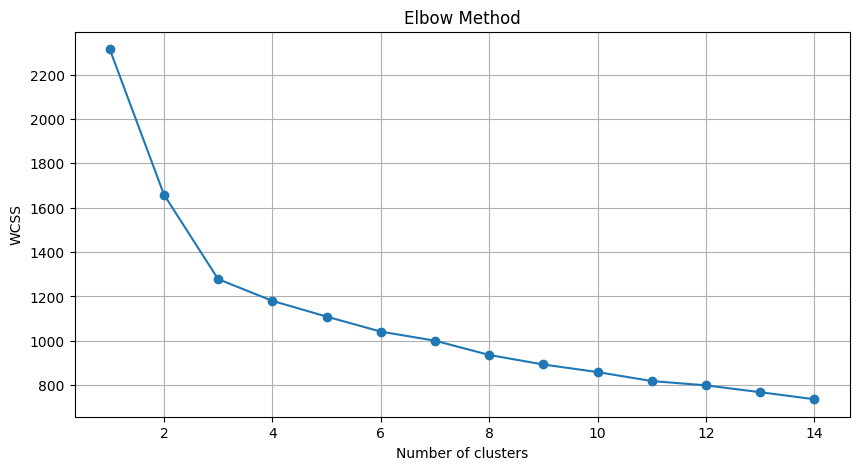

In [42]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(range(1,15), wcss, marker='o')
plt.grid()
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Task 3: K-means Clustering
- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.



In [43]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [44]:
df['clusters'] = kmeans.predict(df_scaled)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### Task 4: Cluster Analysis
- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.



In [45]:
cluster_means = df.groupby('clusters').mean()
print(cluster_means)

            Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
clusters                                                              
0         13.134118    3.307255  2.417647     21.241176   98.666667   
1         13.676774    1.997903  2.466290     17.462903  107.967742   
2         12.250923    1.897385  2.231231     20.063077   92.738462   

          Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
clusters                                                                     
0              1.683922    0.818824              0.451961         1.145882   
1              2.847581    3.003226              0.292097         1.922097   
2              2.247692    2.050000              0.357692         1.624154   

          Color_Intensity       Hue     OD280      Proline  
clusters                                                    
0                7.234706  0.691961  1.696667   619.058824  
1                5.453548  1.065484  3.163387  1100.225806  
2        

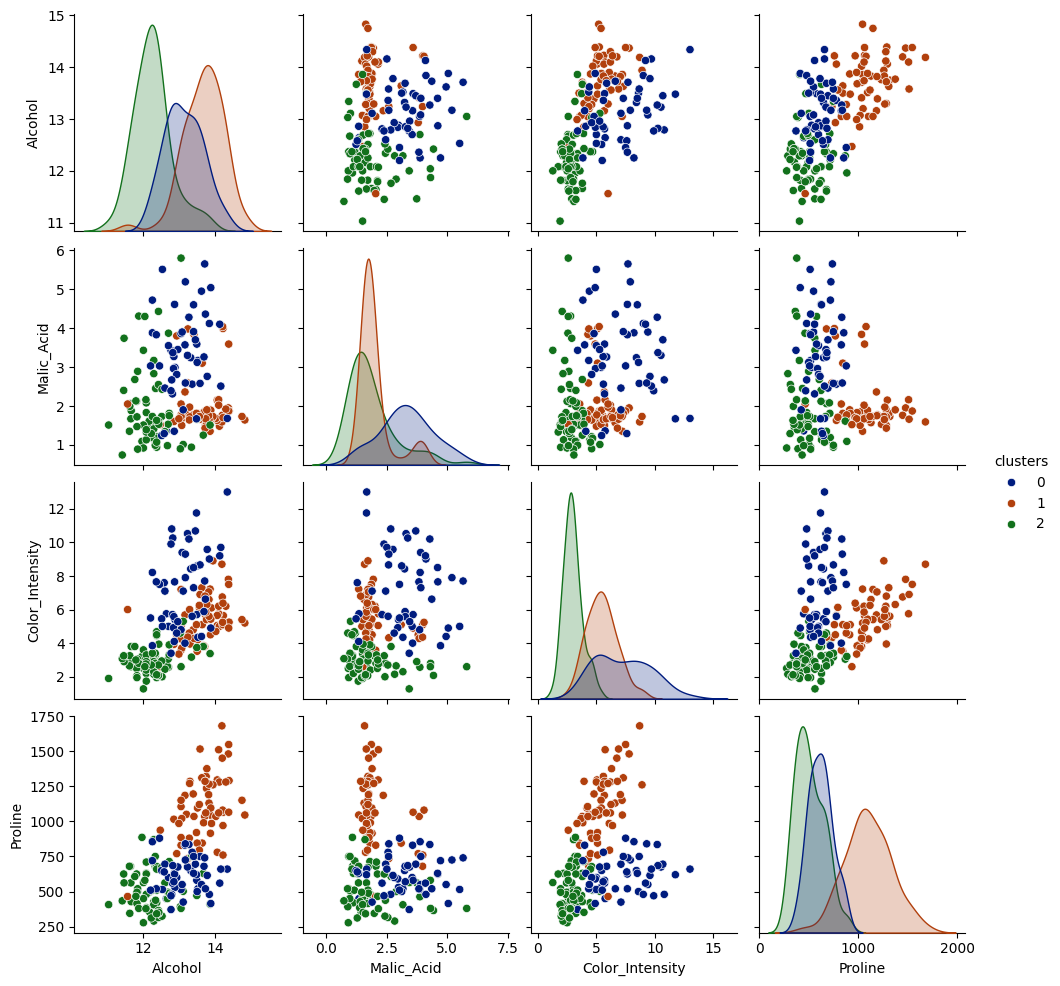

In [28]:
import seaborn as sns
palette = sns.color_palette("dark", n_colors=len(df['clusters'].unique()))
sns.pairplot(df, hue='clusters', vars=['Alcohol', 'Malic_Acid', 'Color_Intensity', 'Proline'],palette=palette)
plt.show()

### Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.


### Cluster 0:
- **Alcohol Content (13.13)**: Moderate alcohol content.
- **Malic Acid (3.31)**: Highest malic acid, indicating more acidity.
- **Total Phenols (1.68) & Flavanoids (0.82)**: Lowest phenol and flavonoid content, suggesting lower antioxidant levels and possibly less complex flavors.
- **Color Intensity (7.23)**: Highest color intensity, so these wines are darker.
- **Proline (619)**: Medium proline level, which could suggest moderate quality.


### Cluster 1:
- **Alcohol Content (13.68)**: Highest alcohol content, indicating stronger wines.
- **Malic Acid (1.99)**: Low acidity.
- **Total Phenols (2.85) & Flavanoids (3.00)**: Highest phenol and flavonoid content, suggesting rich flavors and strong antioxidant properties.
- **Color Intensity (5.45)**: Moderate color intensity.
- **Proline (1100)**: Highest proline, often associated with quality and richness.


### Cluster 2:
- **Alcohol Content (12.25)**: Lowest alcohol content.
- **Malic Acid (1.90)**: Low acidity, similar to Cluster 1.
- **Total Phenols (2.25) & Flavanoids (2.05)**: Moderate levels of phenols and flavonoids, indicating these wines are balanced but not as rich as Cluster 1.
- **Color Intensity (2.97)**: Lowest color intensity, meaning these wines are lighter in color.
- **Proline (510)**: Lowest proline content, suggesting these might be simpler wines with less richness.


### Cluster Characteristics:
- **Cluster 0 ("Bold Acidic Wines")**: High acidity, dark color, less complex flavors.
- **Cluster 1 ("Premium Rich Wines")**: High alcohol, rich flavors, moderate color, and high quality.
- **Cluster 2 ("Light and Easy Wines")**: Low alcohol, light color, simpler, balanced wines.


# Best of Luck